In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/assignment1

/content/drive/MyDrive/assignment1


In [4]:
!ls

MiddleEast.csv				   south_asia_happiness.csv
Pabina_Shrestha_2408294_assignment1.ipynb  WHR-2024-5CS037.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [9]:
df = pd.read_csv('WHR-2024-5CS037.csv')
# 1. Display the first 10 rows
print("First 10 rows:")
print(df.head(10))

#2. Identify the number of rows and columns
rows, cols = df.shape
print(f"\nNumber of rows: {rows}")
print(f"Number of columns: {cols}")

# 3. List all columns and their data types
print("\nColumns and their data types:")
df.dtypes

First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.72

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [10]:
# Basic Statistics:

# 1. Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"\nMean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

# 2. Identify the country with the highest and lowest happiness scores.
# Changed 'Score' to 'score' for consistency
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"\nCountry with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [11]:
# Missing Values:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [12]:
#Filtering and Sorting
# Filter the dataset to show only countries with a Score greater than 7.5
filtered = df[df['score'] > 7.5]
print("\nCountries with Score greater than 7.5:")
print(filtered)

# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
# Check the actual column name in your DataFrame (e.g., 'GDP', 'GDP per capita', 'Log GDP per capita')
# Replace 'GDP per Capita' with the correct column name
sorted = filtered.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted.head(10))


Countries with Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
Top 10 countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [13]:
#Adding new Column
# Create a new column "Happiness Category"
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataset with the new 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']])



Dataset with the new 'Happiness Category' column:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

<ipython-input-14-136e57035c42>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


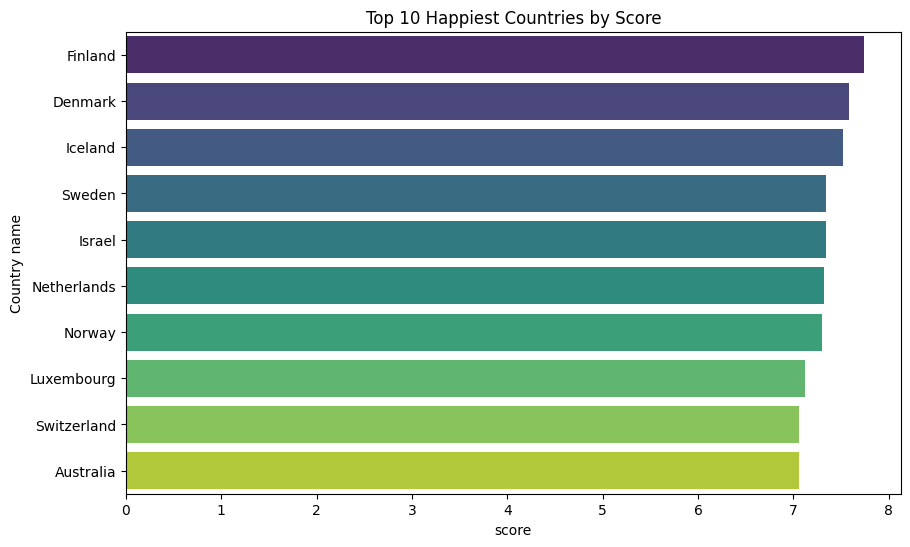

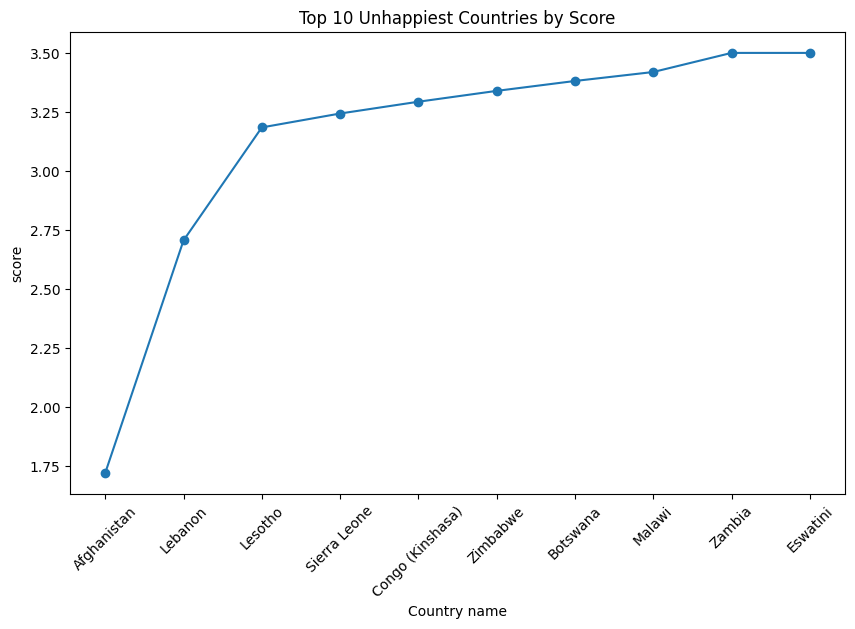

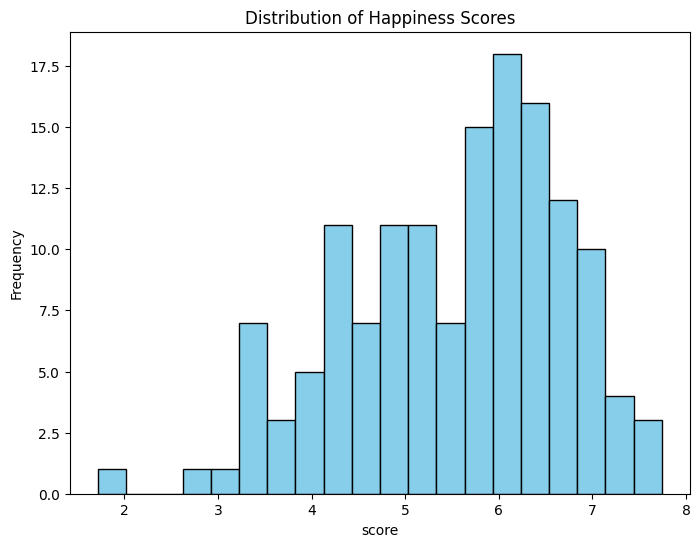

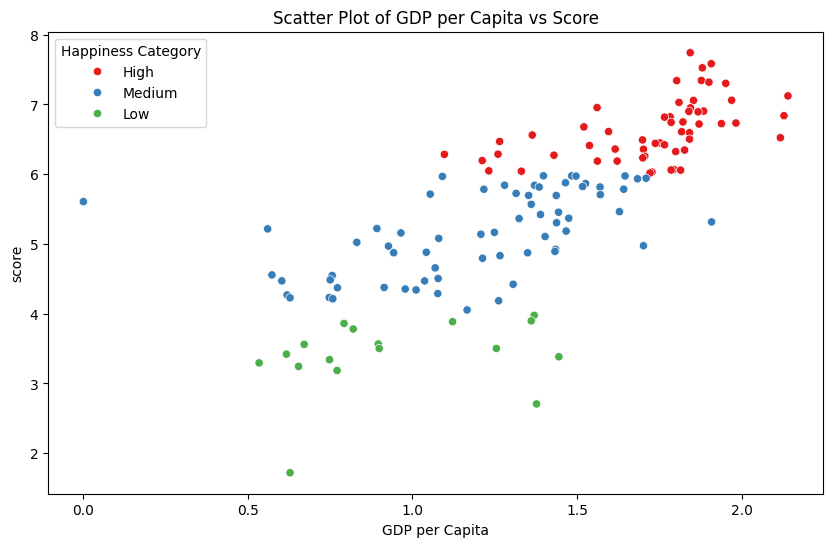

In [14]:
#Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot: Top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('score')
plt.ylabel('Country name')
plt.show()

# Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.show()

# Histogram for the Score column
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='Set1')
plt.title('Scatter Plot of GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('score')
plt.show()


Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [15]:
#  Setup Task - Preparing the South-Asia Dataset:

# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the DataFrame to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered DataFrame to a CSV file
south_asia_df.to_csv('south_asia_happiness.csv', index=False)

# Display the first few rows of the filtered DataFrame (optional)
print("\nSouth Asia Happiness Data:")
print(south_asia_df.head())


South Asia Happiness Data:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
10

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.


<ipython-input-16-93e4d34deeac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (
<ipython-input-16-93e4d34deeac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='muted')


South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


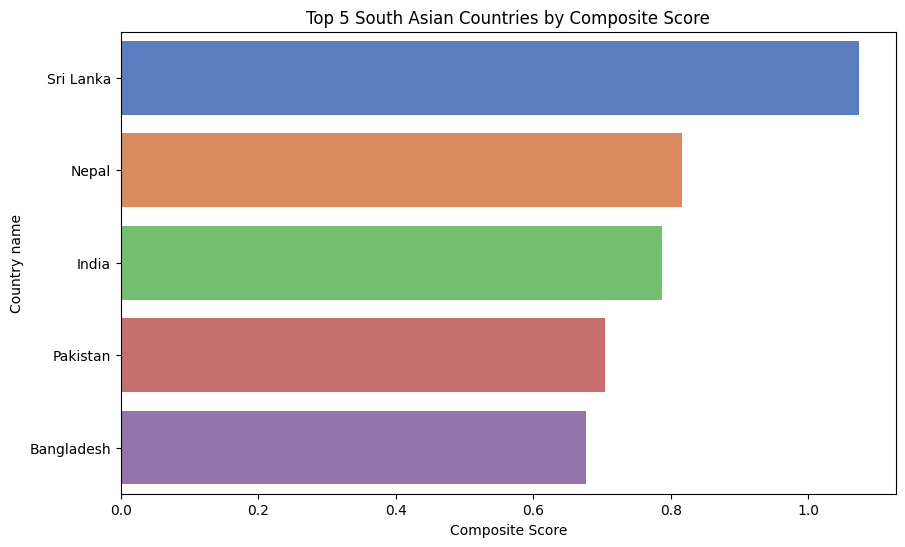

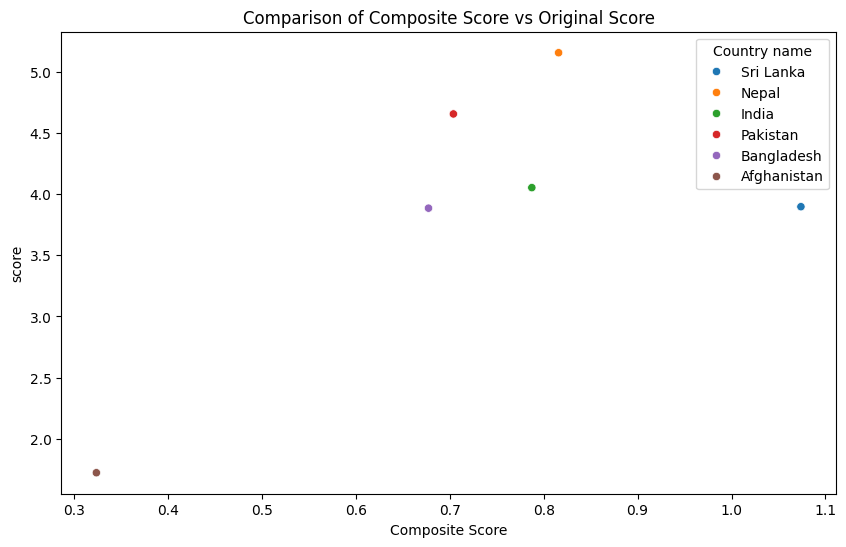

In [16]:
#Composite Score Ranking
# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +  # Changed 'Social Support' to 'Social support'
    0.30 * south_asia_df['Healthy life expectancy']  # Changed 'Healthy life expectancy at birth' to 'Healthy life expectancy'
)

# Rank countries based on Composite Score in descending order
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the rankings
print("South Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

# Horizontal bar chart for top 5 countries by Composite Score
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='muted')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()

# Compare Composite Score rankings with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df, hue='Country name', palette='tab10')
plt.title('Comparison of Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('score')
plt.show()

## Explaination!


In [17]:
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    corr, _ = pearsonr(south_asia_df[metric], south_asia_df['score'])
    print(f"Correlation between {metric} and Score: {corr:.2f}")

Correlation between Freedom to make life choices and Score: 0.80
Correlation between Generosity and Score: 0.87


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Outlier countries based on GDP per Capita and Score:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


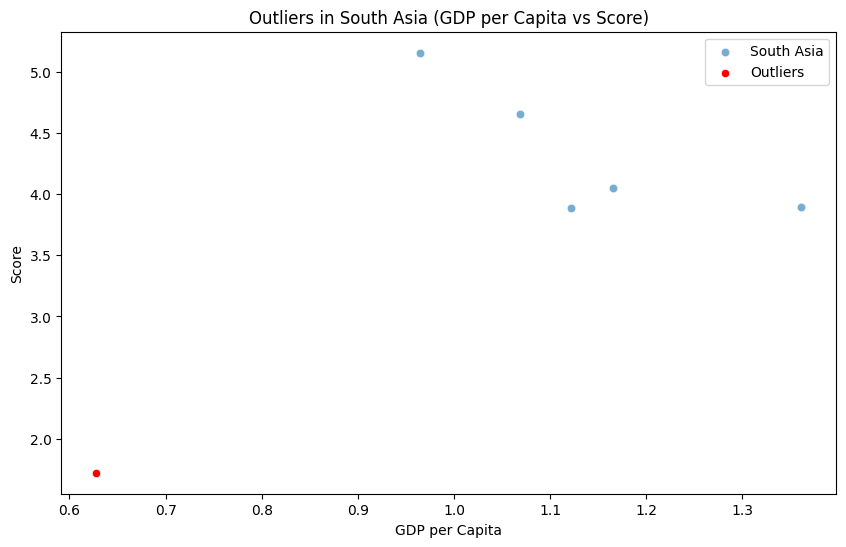

In [ ]:
#outlier detection
# Calculate IQR for GDP per Capita and Score
# Change 'GDP per Capita' to the correct column name (e.g., 'Log GDP per capita')
q1_gdp, q3_gdp = south_asia_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp = q3_gdp - q1_gdp

q1_score, q3_score = south_asia_df['score'].quantile([0.25, 0.75])
iqr_score = q3_score - q1_score

# Define outlier thresholds
low_gdp, high_gdp = q1_gdp - 1.5 * iqr_gdp, q3_gdp + 1.5 * iqr_gdp
low_score, high_score = q1_score - 1.5 * iqr_score, q3_score + 1.5 * iqr_score

# Identify outliers
outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < low_gdp) |  # Change 'GDP per Capita' to 'Log GDP per capita'
    (south_asia_df['Log GDP per capita'] > high_gdp) |  # Change 'GDP per Capita' to 'Log GDP per capita'
    (south_asia_df['score'] < low_score) |
    (south_asia_df['score'] > high_score)
]

print("Outlier countries based on GDP per Capita and Score:")
# Change 'GDP per Capita' to 'Log GDP per capita' and 'Country' to 'Country name'
print(outliers[['Country name', 'Log GDP per capita', 'score']])

# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
# Change 'GDP per Capita' to 'Log GDP per capita' and 'Score' to 'score'
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, label='South Asia', alpha=0.6)
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outliers in South Asia (GDP per Capita vs Score)')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

##Explanation!

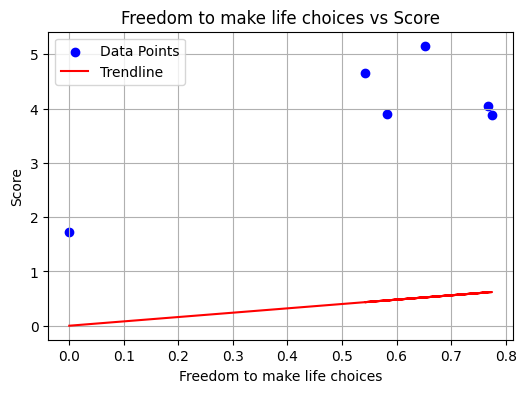

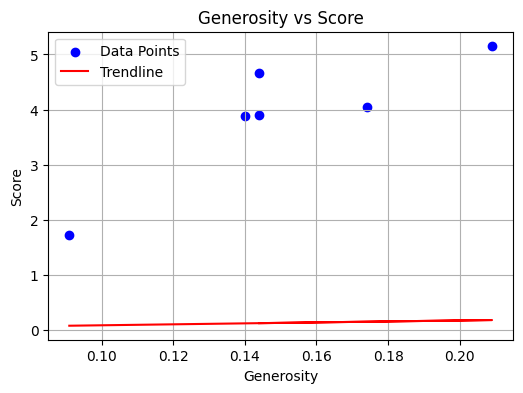

In [18]:
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.scatter(south_asia_df[metric], south_asia_df['score'], color='blue', label='Data Points')
    plt.plot(
        south_asia_df[metric],
        south_asia_df[metric] * pearsonr(south_asia_df[metric], south_asia_df['score'])[0],
        color='red',
        label='Trendline'
    )
    plt.title(f"{metric} vs Score")
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation between Freedom to make life choices and score: 0.8005185224163315
Correlation between Generosity and score: 0.874512371253192


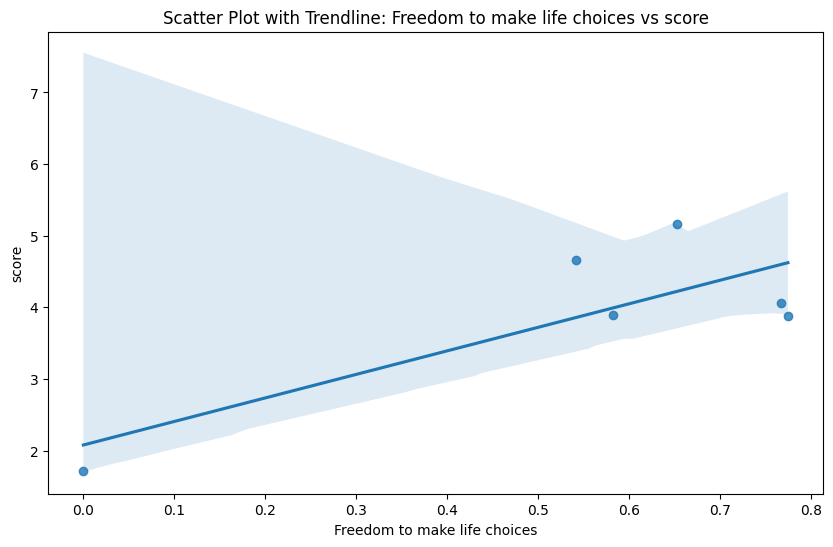

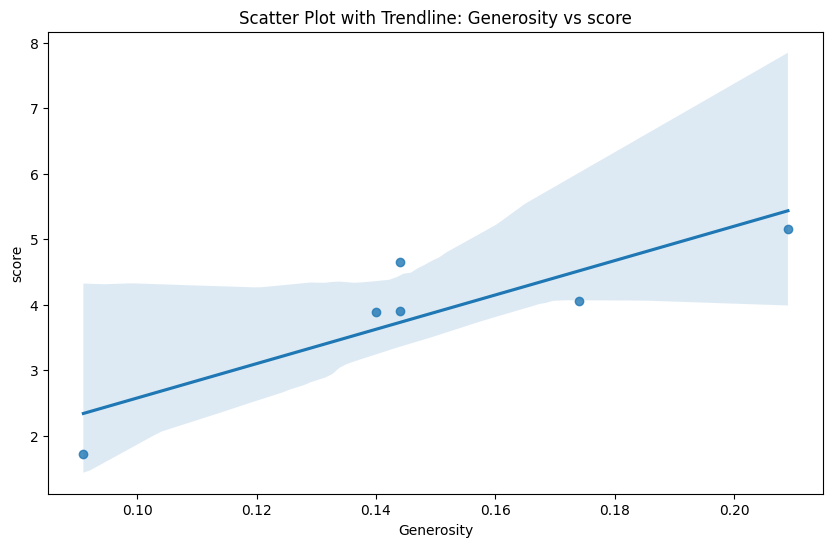

In [ ]:
#Exploring Trends Across Metrics
# Calculate Pearson correlation between selected metrics and Score
# Correct column names: 'Freedom to make life choices', 'score', 'Generosity'
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_df[metric].corr(south_asia_df['score'])
    print(f"Correlation between {metric} and score: {correlation}")

# Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_df)
    plt.title(f'Scatter Plot with Trendline: {metric} vs score')
    plt.xlabel(metric)
    plt.ylabel('score')
    plt.show()

#Explanation!


Top 3 countries with the largest positive gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


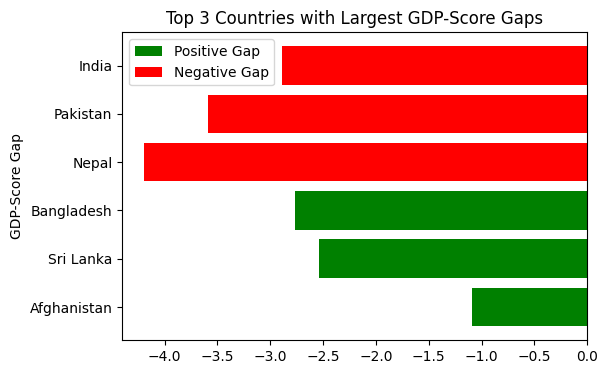

In [19]:
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

ranked_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
ranked_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest positive gaps:")
print(ranked_descending[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest negative gaps:")
print(ranked_ascending[['Country name', 'GDP-Score Gap']].head(3))


top_negative = ranked_ascending[['Country name', 'GDP-Score Gap']].head(3)
top_positive = ranked_descending[['Country name', 'GDP-Score Gap']].head(3)

plt.figure(figsize=(6, 4))
plt.barh(top_positive['Country name'], top_positive['GDP-Score Gap'], color='green', label='Positive Gap')
plt.barh(top_negative['Country name'], top_negative['GDP-Score Gap'], color='red', label='Negative Gap')
plt.title("Top 3 Countries with Largest GDP-Score Gaps")
plt.ylabel("GDP-Score Gap")

plt.legend()
plt.show()

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.



Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


<ipython-input-28-d67bcbe2bbe1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([descending_gap.head(3), ascending_gap.head(3)]), palette='coolwarm')


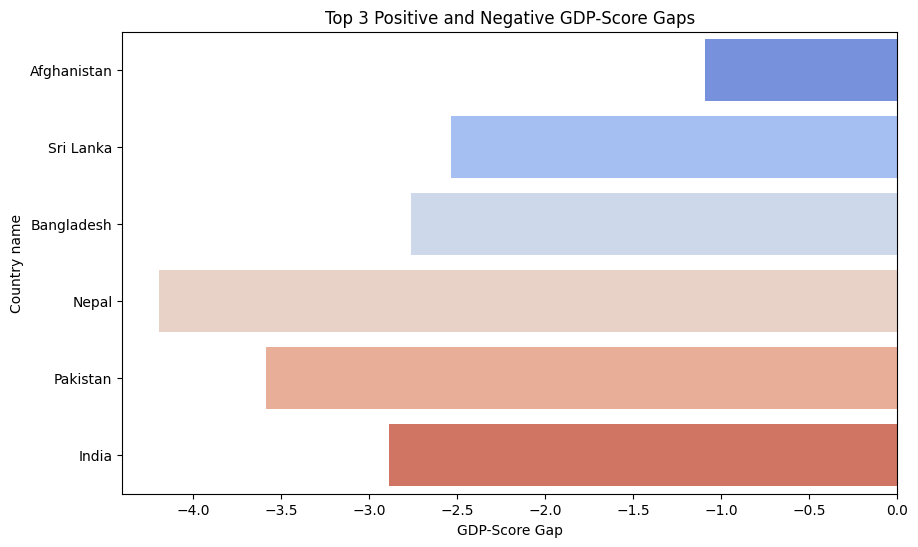

In [ ]:
#Gap of Analysis
# Add a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest positive GDP-Score Gap:")
print(descending_gap[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(ascending_gap[['Country name', 'GDP-Score Gap']].head(3))

# Bar chart for top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([descending_gap.head(3), ascending_gap.head(3)]), palette='coolwarm')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()


### Explaination!

In [21]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Comparision
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57

Middle East has a higher average happiness score.


1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
#Comparative Analysis
# Define the Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered Middle Eastern dataset to a new CSV file
middle_east_df.to_csv('MiddleEast.csv', index=False)
print("Filtered Middle East dataset saved as 'MiddleEast.csv'")


Filtered Middle East dataset saved as 'MiddleEast.csv'


1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [ ]:
#Descriptive Statistics
# Calculate mean and standard deviation for South Asia and Middle East
south_asia_stats = {
    "Mean Score": south_asia_df['score'].mean(),
    "Standard Deviation": south_asia_df['score'].std()
}

middle_east_stats = {
    "Mean Score": middle_east_df['score'].mean(),
    "Standard Deviation": middle_east_df['score'].std()
}

print("South Asia Statistics:", south_asia_stats)
print("Middle East Statistics:", middle_east_stats)

# Determine which region has higher average happiness score
if south_asia_stats["Mean Score"] > middle_east_stats["Mean Score"]:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia Statistics: {'Mean Score': 3.895666666666667, 'Standard Deviation': 1.1770690152521501}
Middle East Statistics: {'Mean Score': 5.412100000000001, 'Standard Deviation': 1.5662011684327144}
Middle East has a higher average happiness score.



2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

<ipython-input-31-96616a8f15e3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis') # Changed 'Score' to 'score', 'Country' to 'Country name'
<ipython-input-31-96616a8f15e3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='coolwarm') # Changed 'Score' to 'score', 'Country' to 'Country name'


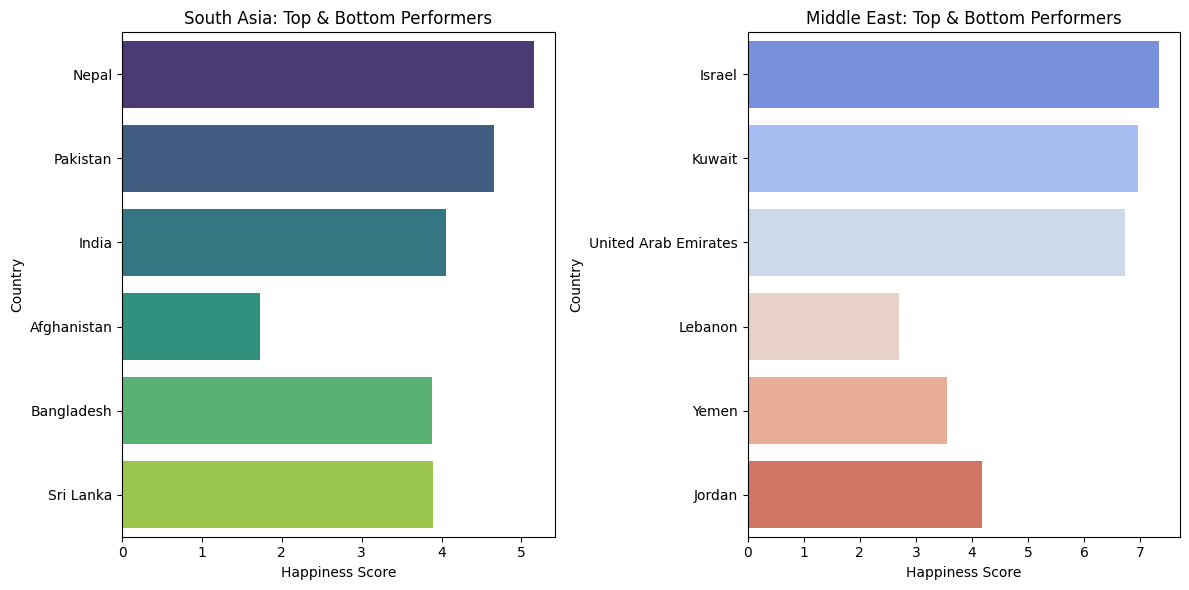

In [ ]:
#Top and Bottom Performers
# Identify top and bottom performers in each region
top_3_sa = south_asia_df.nlargest(3, 'score') # Changed 'Score' to 'score'
bottom_3_sa = south_asia_df.nsmallest(3, 'score') # Changed 'Score' to 'score'

top_3_me = middle_east_df.nlargest(3,
                                   'score') # Changed 'Score' to 'score'
bottom_3_me = middle_east_df.nsmallest(3, 'score')  # Changed 'Score' to 'score'

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis') # Changed 'Score' to 'score', 'Country' to 'Country name'
plt.title('South Asia: Top & Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='coolwarm') # Changed 'Score' to 'score', 'Country' to 'Country name'
plt.title('Middle East: Top & Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

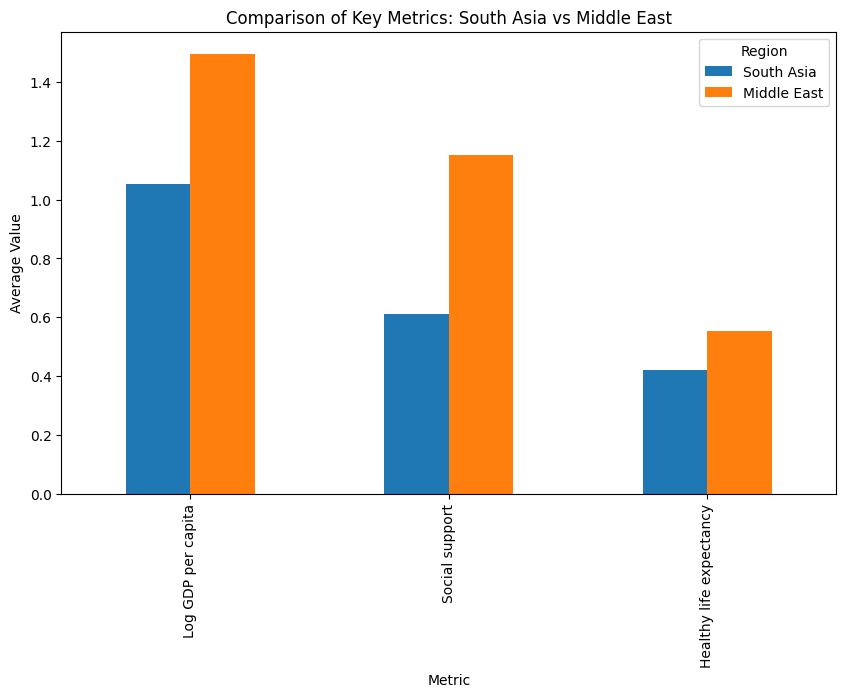

Metric with the largest disparity: Social support


In [ ]:
#Metric Comparisons
# Compare key metrics between regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']  # Changed column names to match the actual DataFrame
region_data = pd.DataFrame({
    'Metric': metrics,
    'South Asia': [south_asia_df[metric].mean() for metric in metrics],
    'Middle East': [middle_east_df[metric].mean() for metric in metrics]
})

region_data.set_index('Metric', inplace=True)

# Grouped bar chart
region_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.legend(title='Region')
plt.show()

# Identify metric with the largest disparity
disparity = abs(region_data['South Asia'] - region_data['Middle East'])
largest_disparity_metric = disparity.idxmax()
print(f"Metric with the largest disparity: {largest_disparity_metric}")

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
#Happiness Disparity
# Compute range and coefficient of variation (CV)
# Change 'Score' to 'score' to match the correct column name in your DataFrame
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {sa_range}, Coefficient of Variation: {sa_cv}")
print(f"Middle East - Range: {me_range}, Coefficient of Variation: {me_cv}")

# Which region has greater variability?
if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405
South Asia has greater variability in happiness.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlations:
Freedom to make life choices: 0.8005185224163315
Generosity: 0.874512371253192

Middle East Correlations:
Freedom to make life choices: 0.8632202433827543
Generosity: 0.6275236536964182


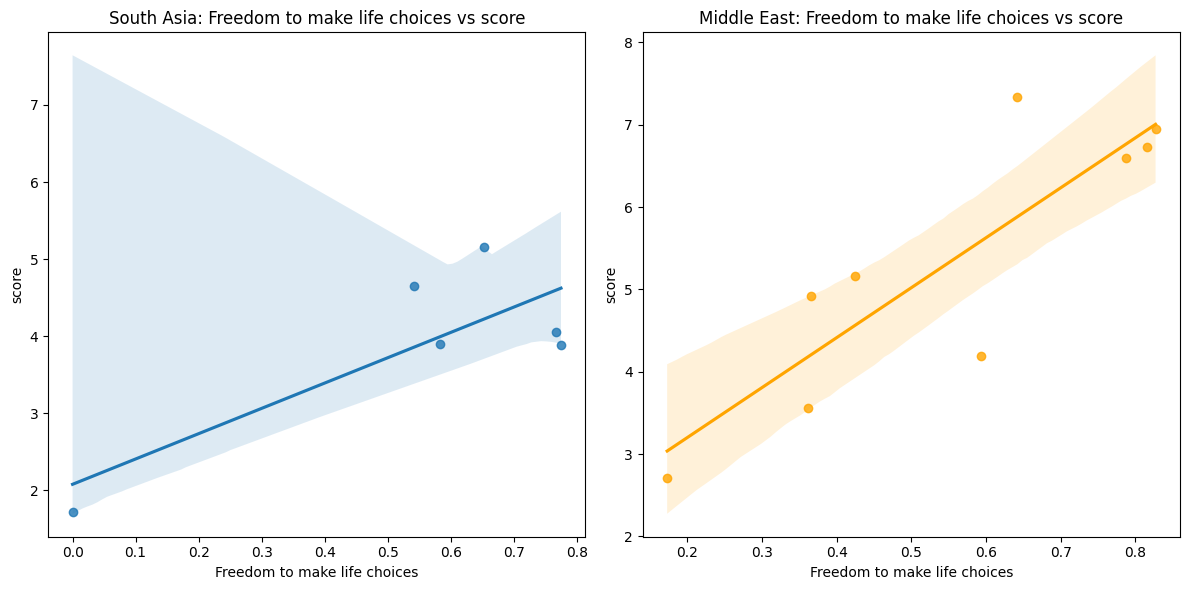

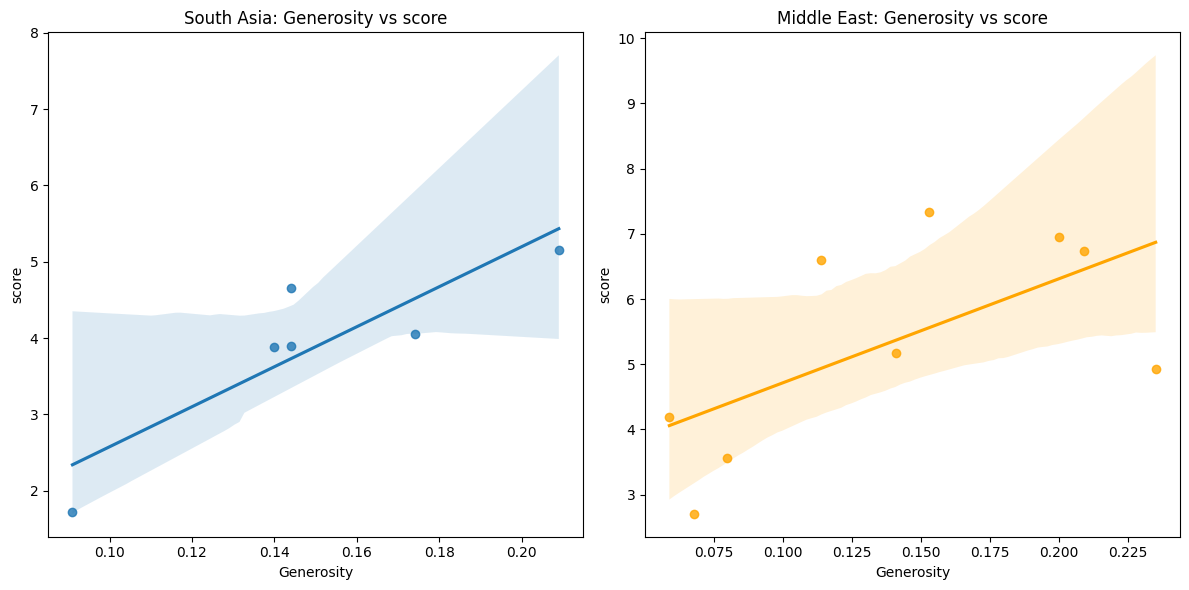

In [ ]:
#Corelation Analysis
# Analyze correlation of Score with Freedom and Generosity in each region
metrics = ['Freedom to make life choices', 'Generosity']  # Changed 'Freedom to Make Life Choices' to 'Freedom to make life choices'

print("South Asia Correlations:")
for metric in metrics:
    correlation = south_asia_df[metric].corr(south_asia_df['score'])  # Changed 'Score' to 'score'
    print(f"{metric}: {correlation}")

print("\nMiddle East Correlations:")
for metric in metrics:
    correlation = middle_east_df[metric].corr(middle_east_df['score'])  # Changed 'Score' to 'score'
    print(f"{metric}: {correlation}")

# Scatter plots
for metric in metrics:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_df, label='South Asia')  # Changed 'Score' to 'score'
    plt.title(f'South Asia: {metric} vs score')  # Changed 'Score' to 'score'
    plt.xlabel(metric)
    plt.ylabel('score')  # Changed 'Score' to 'score'

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_df, label='Middle East', color='orange')  # Changed 'Score' to 'score'
    plt.title(f'Middle East: {metric} vs score')  # Changed 'Score' to 'score'
    plt.xlabel(metric)
    plt.ylabel('score')  # Changed 'Score' to 'score'

    plt.tight_layout()
    plt.show()

6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721


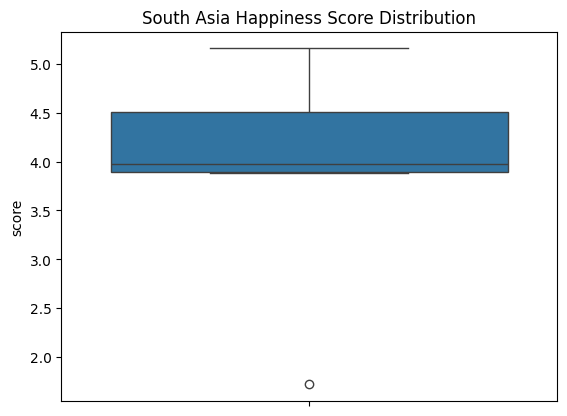

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


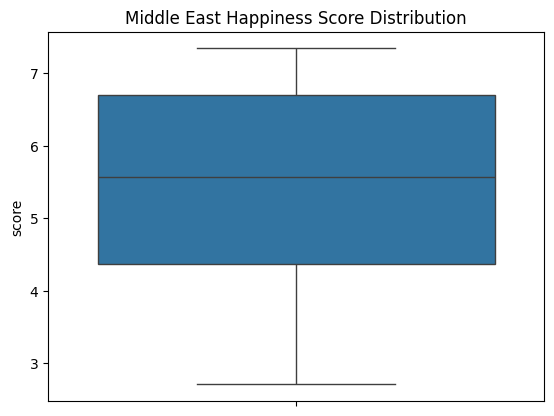

In [ ]:
# Outlier Detection and Visualization
# Detect outliers in both regions
for region_df, region_name in [(south_asia_df, 'South Asia'), (middle_east_df, 'Middle East')]:
    # Change 'Score' to 'score' to match the actual column name
    q1 = region_df['score'].quantile(0.25)
    q3 = region_df['score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Change 'Score' to 'score'
    outliers = region_df[(region_df['score'] < lower_bound) | (region_df['score'] > upper_bound)]
    print(f"Outliers in {region_name}:")
    # Change 'Score' to 'score' if necessary
    print(outliers[['Country name', 'score']])

    # Plot boxplots
    # Change 'Score' to 'score'
    sns.boxplot(data=region_df['score'])
    plt.title(f'{region_name} Happiness Score Distribution')
    plt.show()